# Find Actionable Insights using Machine Learning and XGBoost - Manuel Amunategui

Free Udemy Course: https://www.udemy.com/course/find-actionable-insights-using-machine-learning-and-python/

Dataset Downloaded from: Student Performance Data Set (https://archive.ics.uci.edu/ml/datasets/student+performance)

Source: Paulo Cortez, University of Minho, GuimarÃ£es, Portugal, http://www3.dsi.uminho.pt/pcortez


### Imports

In [1]:
import random
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import seaborn as sns
RANDOM_STATE = 27
plt.style.use('bmh')
pd.set_option("display.max_columns", 100)
warnings.filterwarnings('ignore')

### Data Upload and EDA

In [2]:
student_por_df = pd.read_csv('data/student-por.csv', sep=";")

In [3]:
student_por_df.shape

(649, 33)

In [4]:
student_por_df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [5]:
student_por_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [6]:
student_por_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [7]:
student_por_df['G3'].describe()

count    649.000000
mean      11.906009
std        3.230656
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

In [8]:
student_por_df['G3'].value_counts()

11    104
10     97
13     82
12     72
14     63
15     49
16     36
9      35
8      35
17     29
0      15
18     15
7      10
6       3
19      2
5       1
1       1
Name: G3, dtype: int64

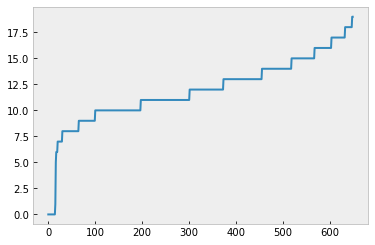

In [9]:
plt.plot(sorted(student_por_df['G3']))
plt.grid()

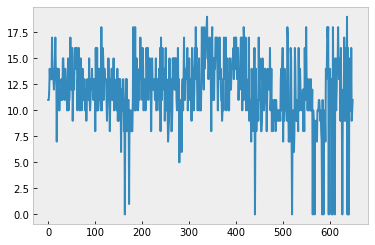

In [10]:
plt.plot(student_por_df['G3'])
plt.grid()

### Data Exploration 

In [11]:
numeric_cols = student_por_df.columns[student_por_df.dtypes != "object"].values
object_cols = student_por_df.columns[student_por_df.dtypes == "object"].values

In [12]:
numeric_cols

array(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3'], dtype=object)

In [13]:
object_cols

array(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'], dtype=object)

In [14]:
dash = '-' * 60
print(dash)
print('{:<20}{}'.format("Feature",'Unique Values'))
print(dash)
for col in object_cols:
    print('{:<20}{}'.format(col,set(student_por_df[col])))

------------------------------------------------------------
Feature             Unique Values
------------------------------------------------------------
school              {'GP', 'MS'}
sex                 {'M', 'F'}
address             {'U', 'R'}
famsize             {'LE3', 'GT3'}
Pstatus             {'T', 'A'}
Mjob                {'teacher', 'services', 'health', 'other', 'at_home'}
Fjob                {'teacher', 'services', 'health', 'other', 'at_home'}
reason              {'home', 'course', 'reputation', 'other'}
guardian            {'mother', 'other', 'father'}
schoolsup           {'yes', 'no'}
famsup              {'yes', 'no'}
paid                {'yes', 'no'}
activities          {'yes', 'no'}
nursery             {'yes', 'no'}
higher              {'yes', 'no'}
internet            {'yes', 'no'}
romantic            {'yes', 'no'}


In [15]:
student_por_df = pd.get_dummies(student_por_df, drop_first=True)

In [16]:
student_por_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,11,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0


### XGBoost Modeling

In [35]:
outcome = "G3"
features = student_por_df.columns.to_list()
features.remove(outcome)

In [36]:
print(features)

['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother', 'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes', 'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes', 'romantic_yes']


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(student_por_df, 
                                                 student_por_df[outcome], 
                                                 test_size=0.3, 
                                                 random_state=42)

In [53]:
import xgboost as xgb

xgb_params = {
    'eta': 0.01,
    'max_depth': 3,
    'subample': 0.7,    
    'colsample_bytree':0.7,
    'objective': 'reg:linear',
    'seed': 0
}

# read in data
dtrain = xgb.DMatrix(X_train[features], y_train, feature_names = features)
dtest = xgb.DMatrix(X_test[features], y_test, feature_names = features)

evals =[(dtrain, 'train'),(dtest, 'eval')]

xgb_model = xgb.train(
    params=xgb_params, 
    dtrain=dtrain, 
    num_boost_round=2000,
    verbose_eval=50,
    early_stopping_rounds=500,
    evals=evals,
    maximize=False
)

[14:45:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[14:45:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { subample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:11.64970	eval-rmse:11.94293
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 500 rounds.
[50]	train-rmse:7.17822	eval-rmse:7.37865
[100]	train-rmse:4.49050	eval-rmse:4.61772
[150]	train-rmse:2.89388	eval-rmse:2.97624
[200]	train-rmse:1.97438	eval-rmse:2.04642
[250]	train-rmse:1.47032	eval-rmse:1.55148
[300]	train-rmse:1.20660	eval-rmse:1

### Visualization 

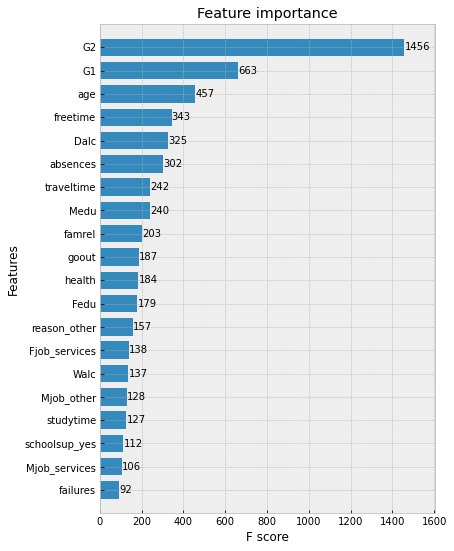

In [61]:
fig, ax = plt.subplots(figsize=(6,9))
xgb.plot_importance(xgb_model,  height=.75, ax=ax, max_num_features=20)
plt.show()

In [63]:
# len(features)
xgb_model.get_fscore()

{'G2': 1456,
 'G1': 663,
 'failures': 92,
 'absences': 302,
 'reason_other': 157,
 'nursery_yes': 78,
 'higher_yes': 36,
 'Dalc': 325,
 'school_MS': 43,
 'age': 457,
 'schoolsup_yes': 112,
 'Medu': 240,
 'Walc': 137,
 'Fjob_teacher': 5,
 'Fjob_health': 4,
 'Mjob_other': 128,
 'address_U': 41,
 'goout': 187,
 'health': 184,
 'traveltime': 242,
 'famsup_yes': 45,
 'freetime': 343,
 'famrel': 203,
 'activities_yes': 35,
 'Fedu': 179,
 'Mjob_teacher': 58,
 'Mjob_services': 106,
 'sex_M': 89,
 'studytime': 127,
 'paid_yes': 28,
 'internet_yes': 43,
 'famsize_LE3': 69,
 'romantic_yes': 40,
 'reason_home': 68,
 'reason_reputation': 23,
 'guardian_mother': 32,
 'Fjob_other': 26,
 'Fjob_services': 138,
 'Mjob_health': 33,
 'guardian_other': 1}

In [65]:
xgb_feature_importance = pd.DataFrame(list(xgb_model.get_fscore().items()), 
                                      columns=['features','importance']
                                     ).sort_values('importance',ascending=False)
xgb_feature_importance.head(10)

,features,importance
0,G2,1456
1,G1,663
9,age,457
21,freetime,343
7,Dalc,325
3,absences,302
19,traveltime,242
11,Medu,240
22,famrel,203
17,goout,187


In [66]:
print(xgb_model.predict(dtest)[0:10])

[17.218437  11.443086  17.61055   11.1597395 11.462687  16.518606
 17.067638  10.312415  10.724223  10.684289 ]


In [67]:
key_features = list(xgb_feature_importance['features'].values[0:40])
key_features

['G2',
 'G1',
 'age',
 'freetime',
 'Dalc',
 'absences',
 'traveltime',
 'Medu',
 'famrel',
 'goout',
 'health',
 'Fedu',
 'reason_other',
 'Fjob_services',
 'Walc',
 'Mjob_other',
 'studytime',
 'schoolsup_yes',
 'Mjob_services',
 'failures',
 'sex_M',
 'nursery_yes',
 'famsize_LE3',
 'reason_home',
 'Mjob_teacher',
 'famsup_yes',
 'internet_yes',
 'school_MS',
 'address_U',
 'romantic_yes',
 'higher_yes',
 'activities_yes',
 'Mjob_health',
 'guardian_mother',
 'paid_yes',
 'Fjob_other',
 'reason_reputation',
 'Fjob_teacher',
 'Fjob_health',
 'guardian_other']

### Customized output

In [70]:
predicted_students_in_trouble = X_test[X_test['G3'] < 10]

In [71]:
len(predicted_students_in_trouble)

26

In [86]:
predicted_students_in_trouble

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
131,18,2,1,1,2,3,5,4,5,1,3,5,10,10,9,8,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,1,1
81,15,2,3,1,3,0,5,3,2,1,2,5,2,10,9,9,0,1,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0
585,17,3,1,2,3,0,4,2,3,2,2,3,5,8,7,8,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0
177,16,1,3,1,1,1,5,3,3,1,4,2,2,9,8,8,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
174,17,2,1,2,1,1,3,3,2,2,2,5,8,8,8,9,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,1,1
478,16,1,1,2,2,3,3,4,3,1,1,1,0,7,7,8,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0
522,16,4,4,1,2,0,4,3,4,1,2,3,4,8,8,8,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,1,1
163,18,1,1,1,1,2,2,3,5,2,5,4,0,11,9,0,0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1
570,16,2,2,2,1,0,5,4,3,2,4,4,6,7,8,8,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,1,1,1
257,17,4,4,1,1,0,4,2,1,1,2,5,6,10,8,9,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0


In [89]:
students_in_trouble_dict = predicted_students_in_trouble.to_dict(orient='index')

In [100]:
# students_in_trouble_dict

In [108]:
lower_limit = 0.25
upper_limit = 0.75
for index,content in students_in_trouble_dict.items():
    print('Student ID:', index)
    for feature in key_features:
        if content[feature] < student_por_df[feature].quantile(lower_limit):
            print('\t',"Below:", feature, content[feature],
                 'Class:', np.round(np.mean(student_por_df[feature]),2))
        if content[feature] > student_por_df[feature].quantile(upper_limit):
            print('\t',"Above:", feature, content[feature],
                 'Class:', np.round(np.mean(student_por_df[feature]),2))

Student ID: 131
	 Below: G2 9 Class: 11.57
	 Above: absences 10 Class: 3.66
	 Above: goout 5 Class: 3.18
	 Above: Mjob_services 1 Class: 0.21
	 Above: failures 3 Class: 0.22
	 Below: higher_yes 0 Class: 0.89
	 Above: reason_reputation 1 Class: 0.22
Student ID: 81
	 Below: G2 9 Class: 11.57
	 Below: age 15 Class: 16.74
	 Above: studytime 3 Class: 1.93
	 Above: schoolsup_yes 1 Class: 0.1
	 Below: nursery_yes 0 Class: 0.8
	 Above: reason_home 1 Class: 0.23
Student ID: 585
	 Below: G2 7 Class: 11.57
	 Below: G1 8 Class: 11.4
	 Below: freetime 2 Class: 3.18
	 Above: studytime 3 Class: 1.93
	 Below: internet_yes 0 Class: 0.77
	 Below: higher_yes 0 Class: 0.89
	 Above: paid_yes 1 Class: 0.06
	 Above: guardian_other 1 Class: 0.06
Student ID: 177
	 Below: G2 8 Class: 11.57
	 Below: G1 9 Class: 11.4
	 Below: Medu 1 Class: 2.51
	 Above: Walc 4 Class: 2.28
	 Above: failures 1 Class: 0.22
	 Below: higher_yes 0 Class: 0.89
Student ID: 174
	 Below: G2 8 Class: 11.57
	 Below: G1 8 Class: 11.4
	 Above:

### Better Visualization

In [116]:
[content.get(key) for key in ['age']]

[18]

Student ID: 131


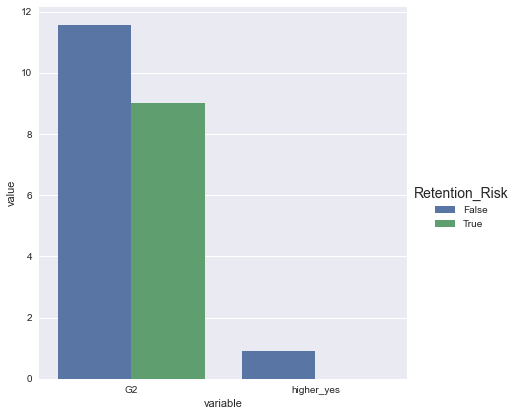

Student ID: 81


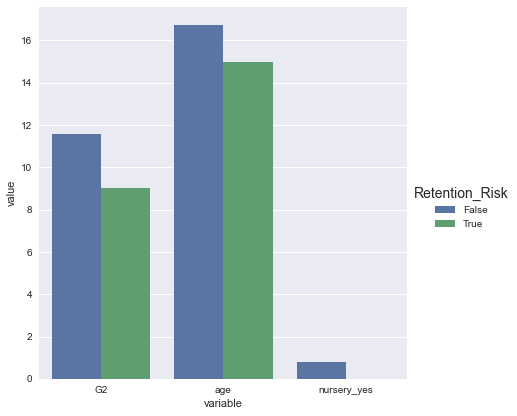

Student ID: 585


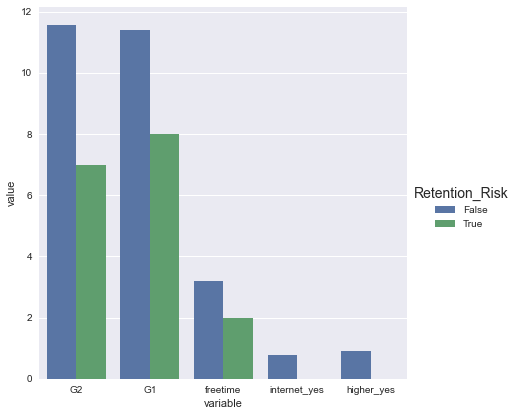

Student ID: 177


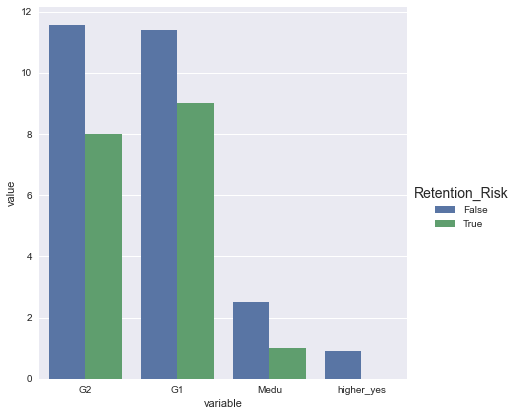

Student ID: 174


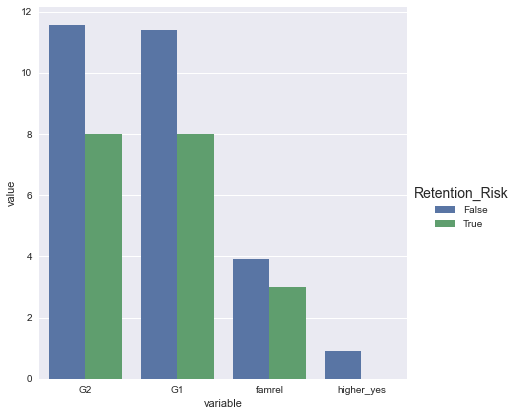

Student ID: 478


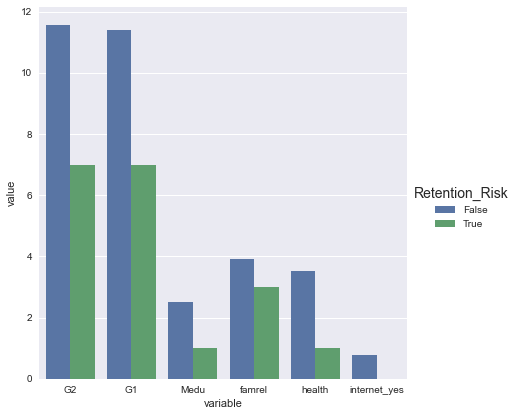

Student ID: 522


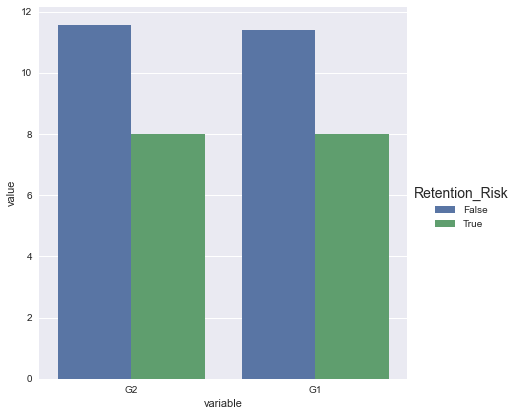

Student ID: 163


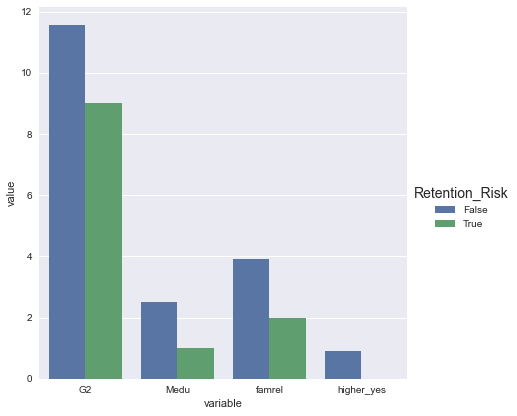

Student ID: 570


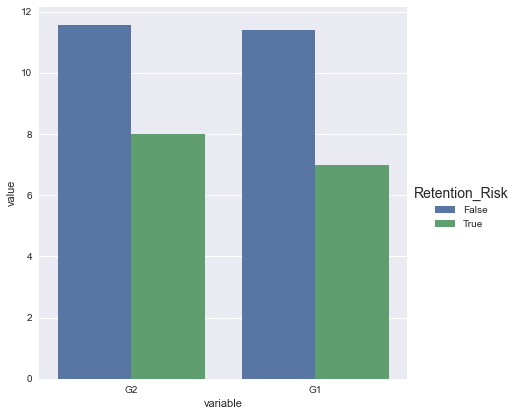

Student ID: 257


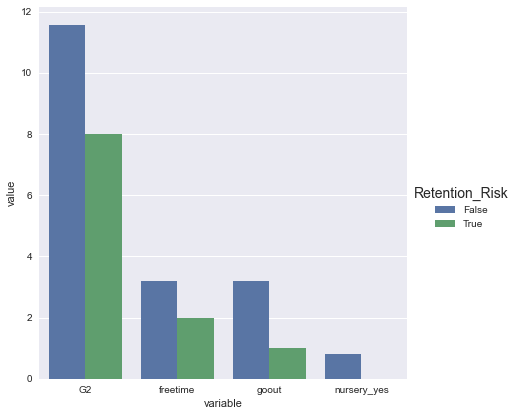

Student ID: 148


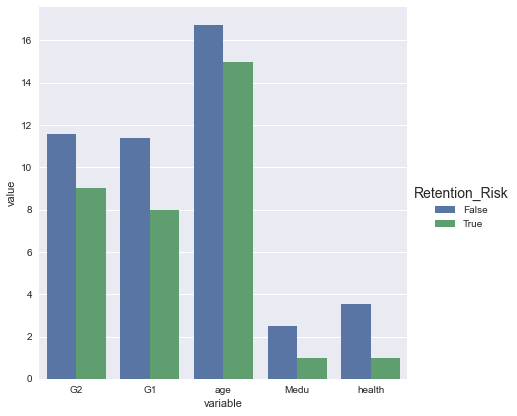

Student ID: 447


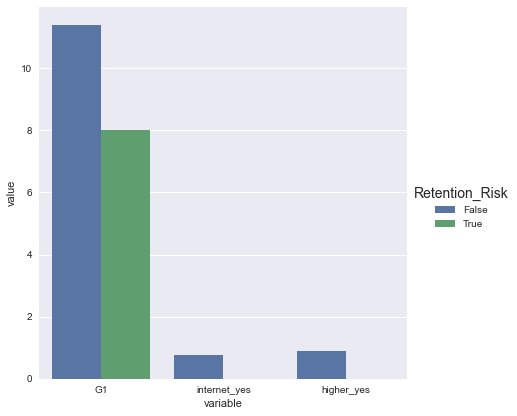

Student ID: 518


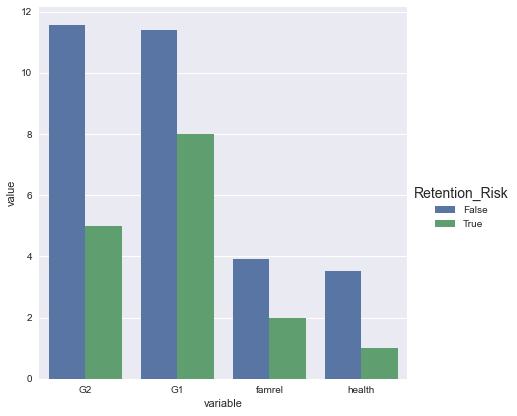

Student ID: 603


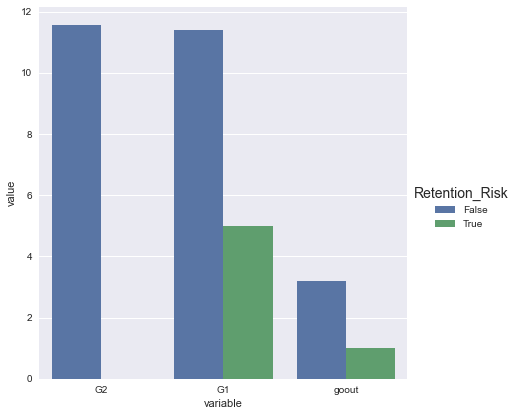

Student ID: 514


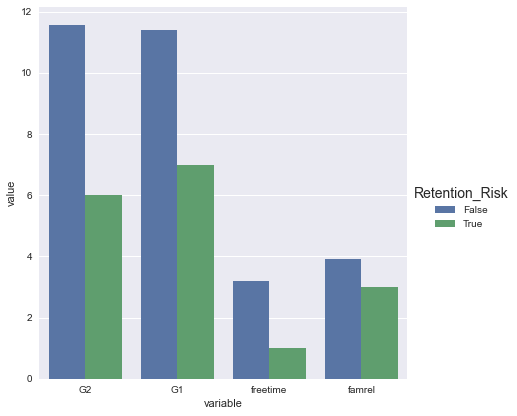

Student ID: 568


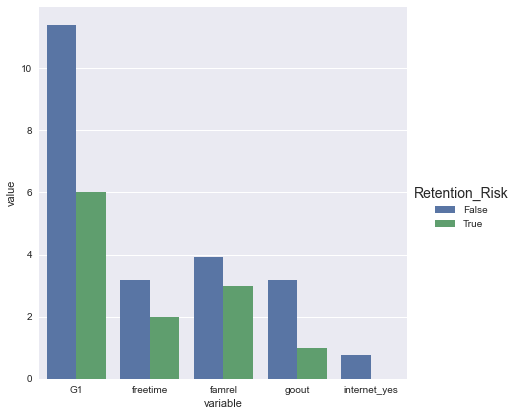

Student ID: 440


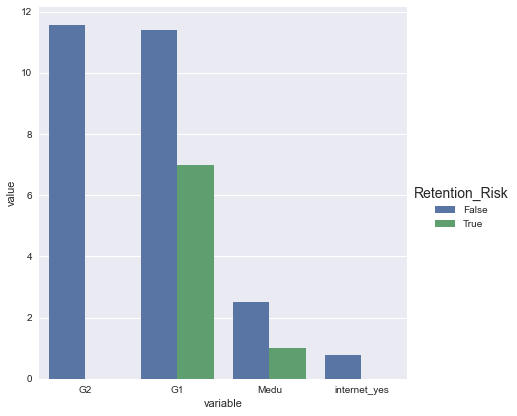

Student ID: 443


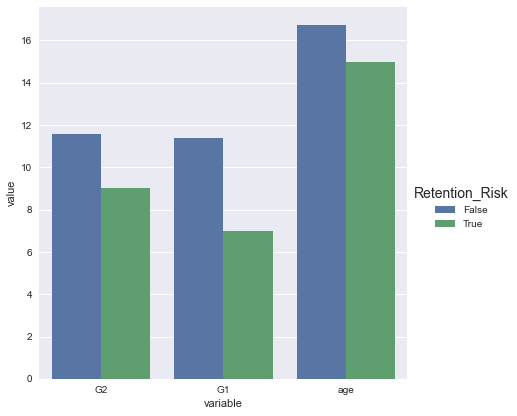

Student ID: 155


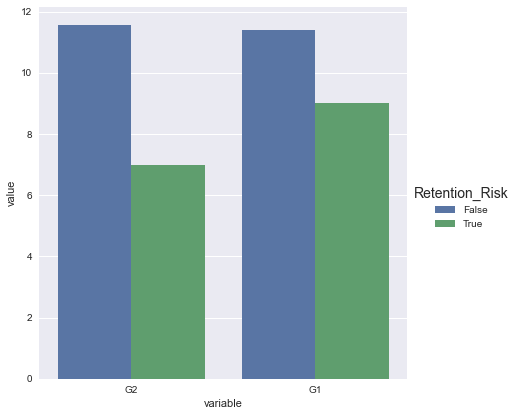

Student ID: 248


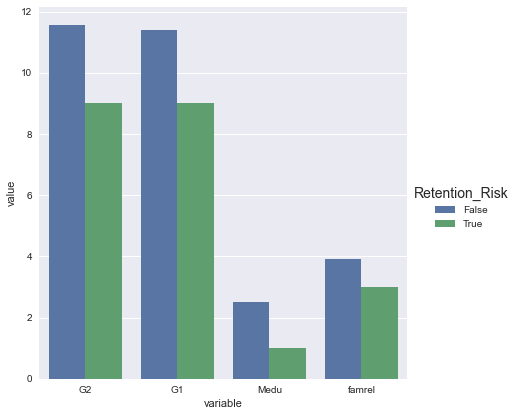

Student ID: 494


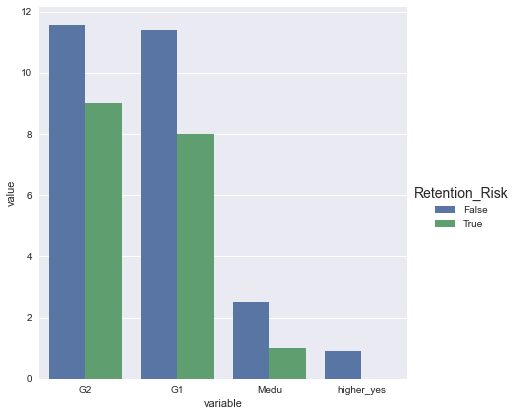

Student ID: 563


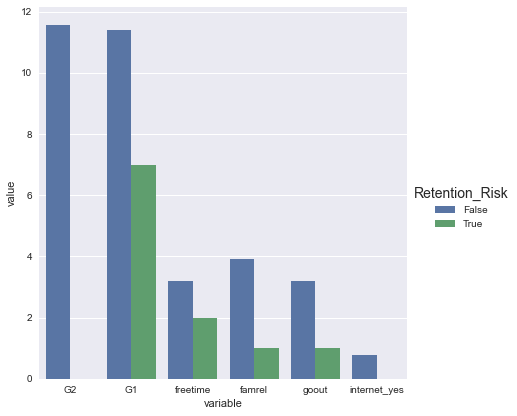

Student ID: 432


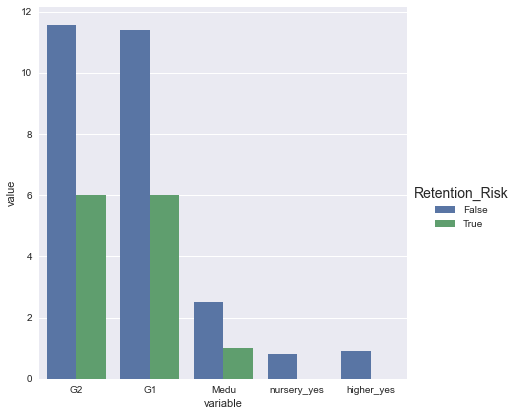

Student ID: 583


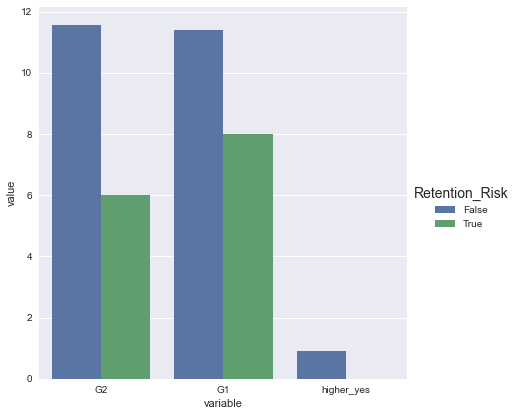

Student ID: 370


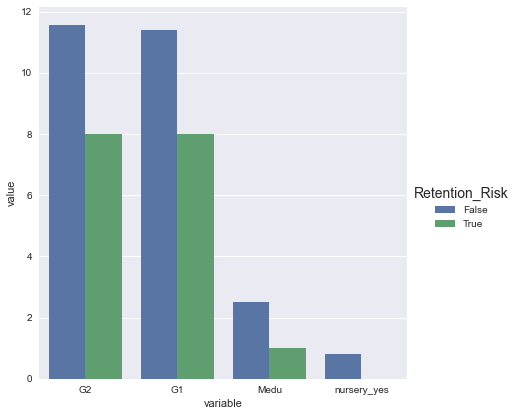

Student ID: 256


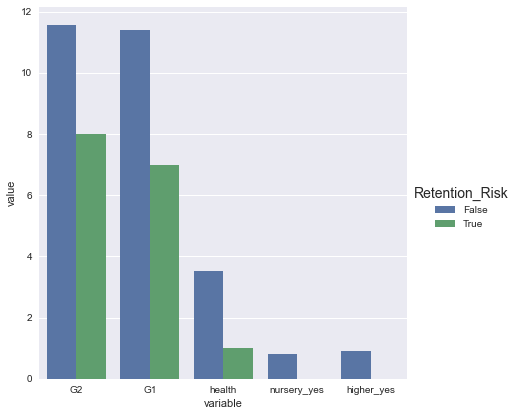

In [145]:
plt.style.use("seaborn")
lower_limit = 0.25
# upper_limit = 0.75

# for index,content in students_in_trouble_dict.items():
for index,content in predicted_students_in_trouble.iterrows():
    student_id = index
    important_low_features = []

    for feature in key_features:
        if content[feature] < student_por_df[feature].quantile(lower_limit):
            important_low_features.append(feature)

    at_risk_student = pd.DataFrame(content[important_low_features]).T
    at_risk_student['Retention_Risk'] = True
    
    student_mean = pd.DataFrame(student_por_df[important_low_features].mean(axis=0)).T
    student_mean['Retention_Risk'] = False
    
    student_profile = pd.concat([at_risk_student, student_mean])
    student_profile = pd.melt(student_profile, id_vars="Retention_Risk")
#     print([content.get(key) for key in important_low_features])
    print('Student ID:', student_id)
    sns.catplot(x='variable', y='value',height=6, hue='Retention_Risk',data=student_profile, kind='bar', 
                )

    plt.show()

In [141]:
print(plt.style.available)



['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Student ID: 131


<Figure size 1152x432 with 0 Axes>

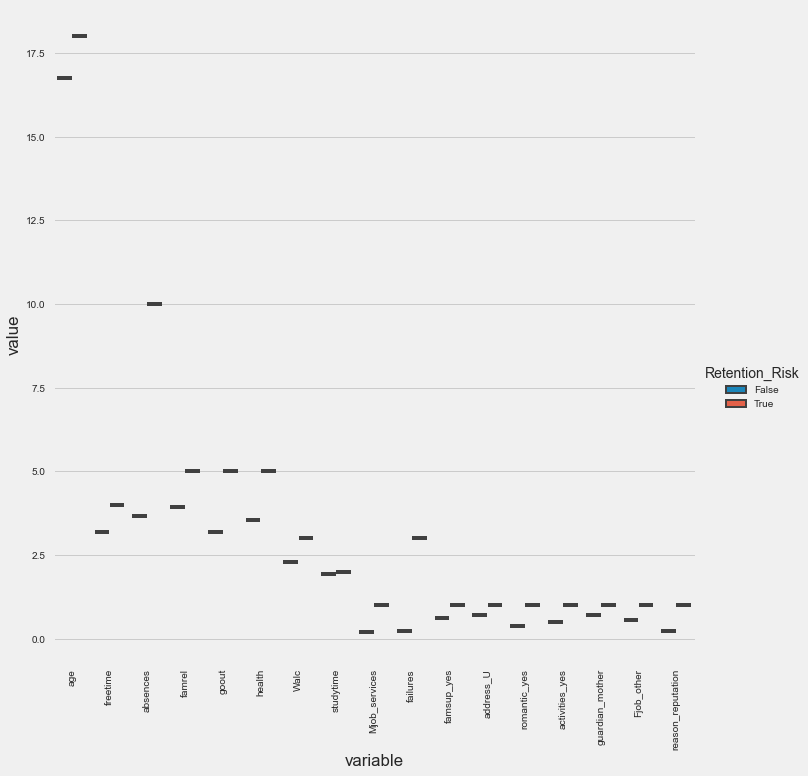

Student ID: 81


<Figure size 1152x432 with 0 Axes>

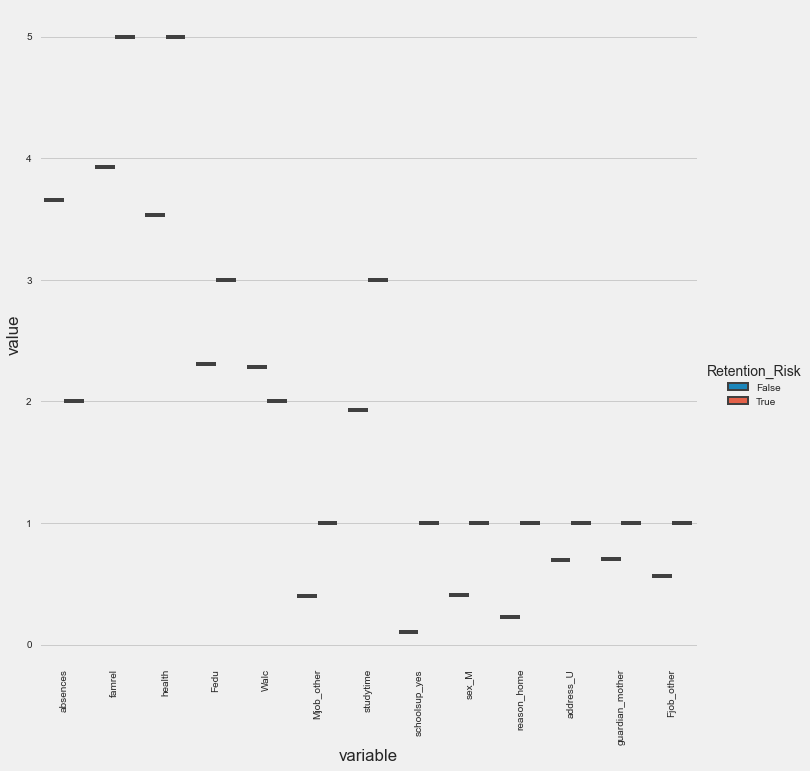

Student ID: 585


<Figure size 1152x432 with 0 Axes>

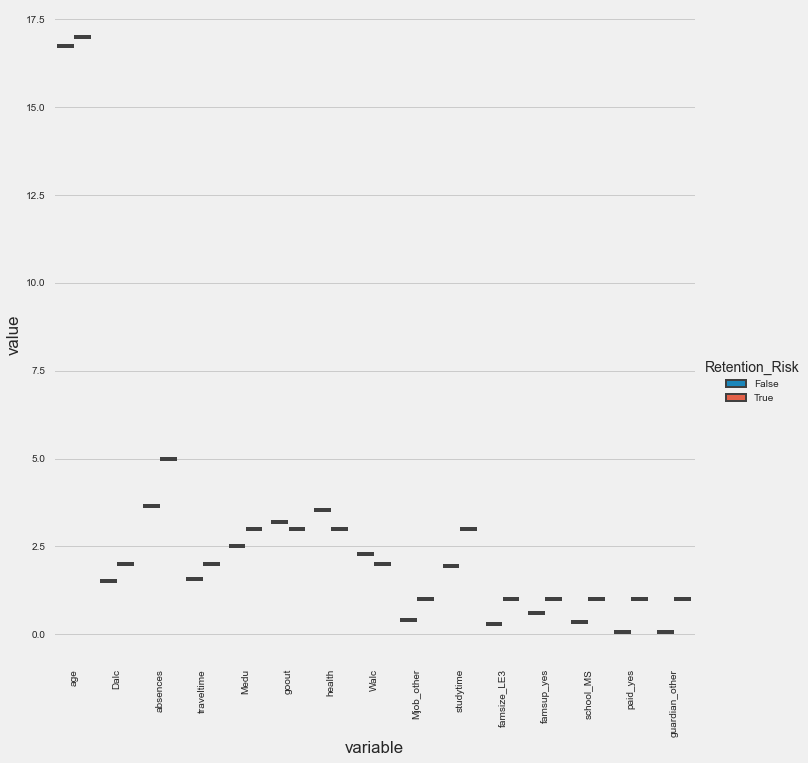

Student ID: 177


<Figure size 1152x432 with 0 Axes>

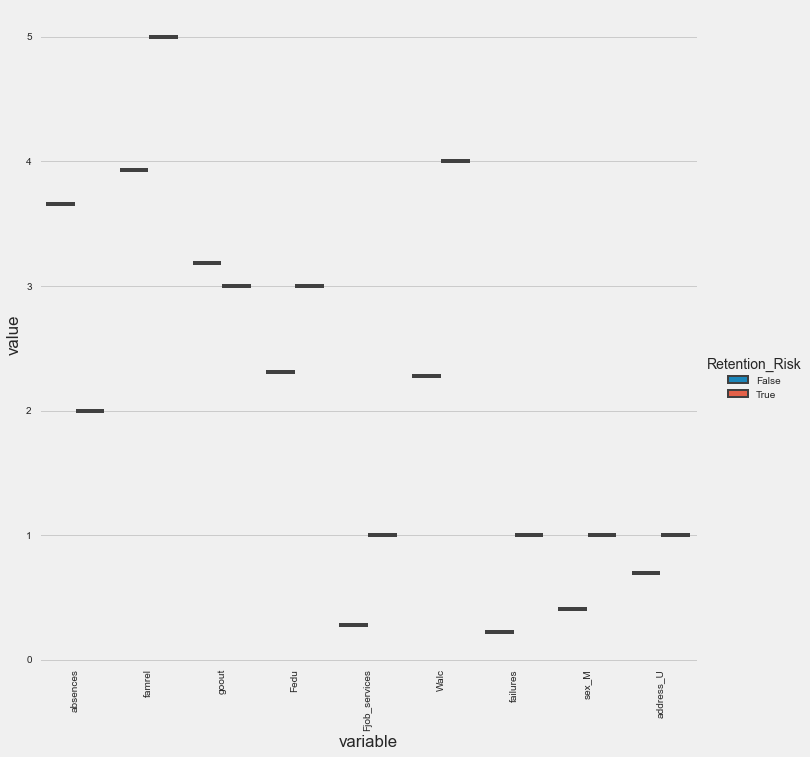

Student ID: 174


<Figure size 1152x432 with 0 Axes>

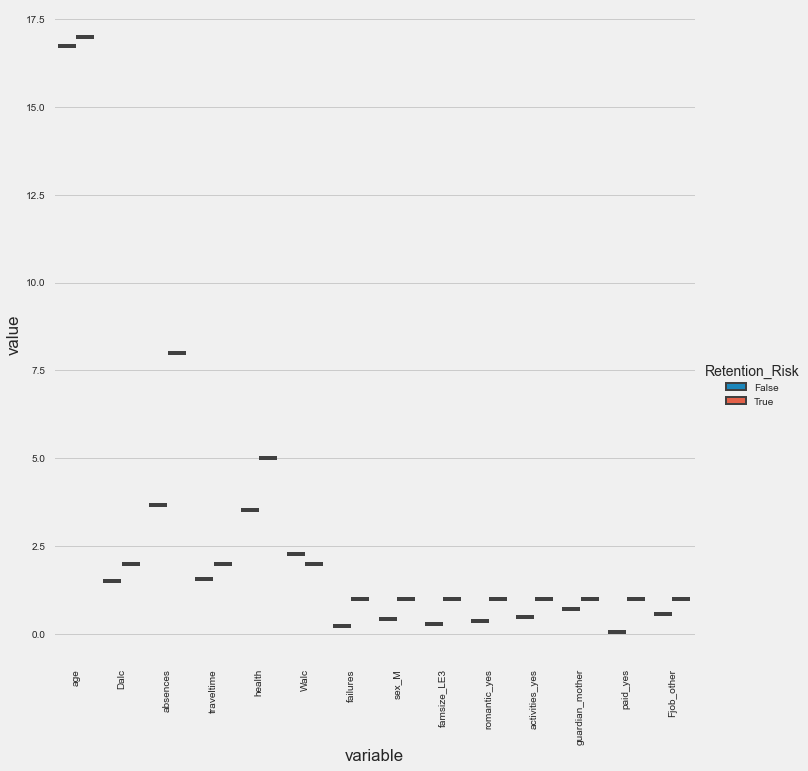

Student ID: 478


<Figure size 1152x432 with 0 Axes>

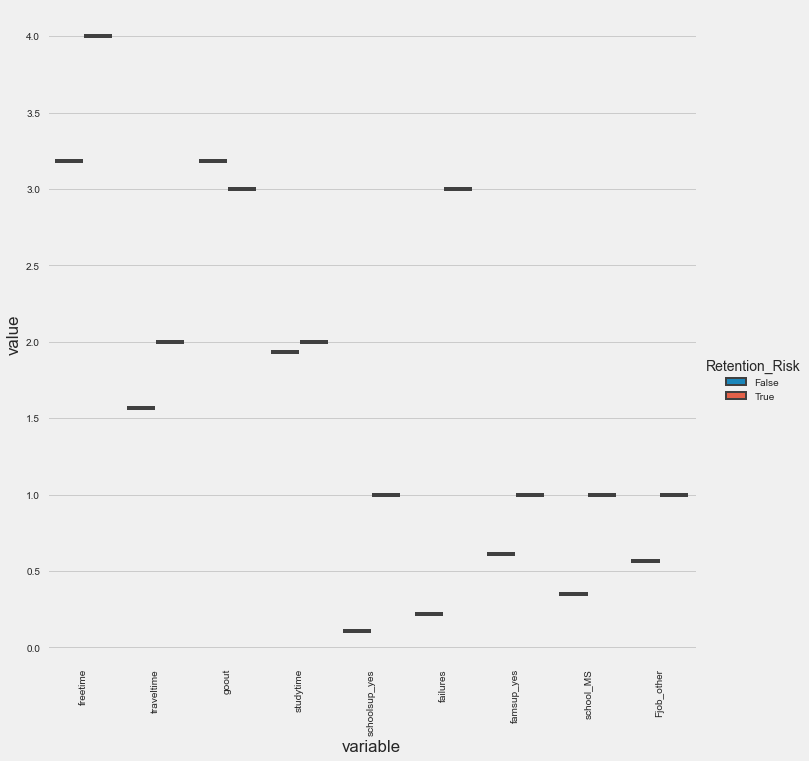

Student ID: 522


<Figure size 1152x432 with 0 Axes>

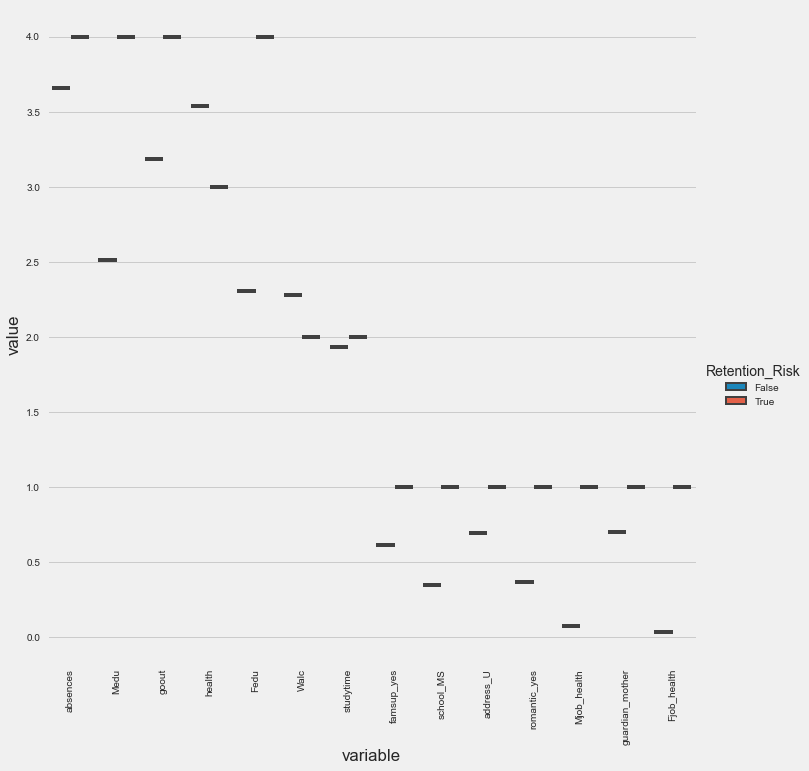

Student ID: 163


<Figure size 1152x432 with 0 Axes>

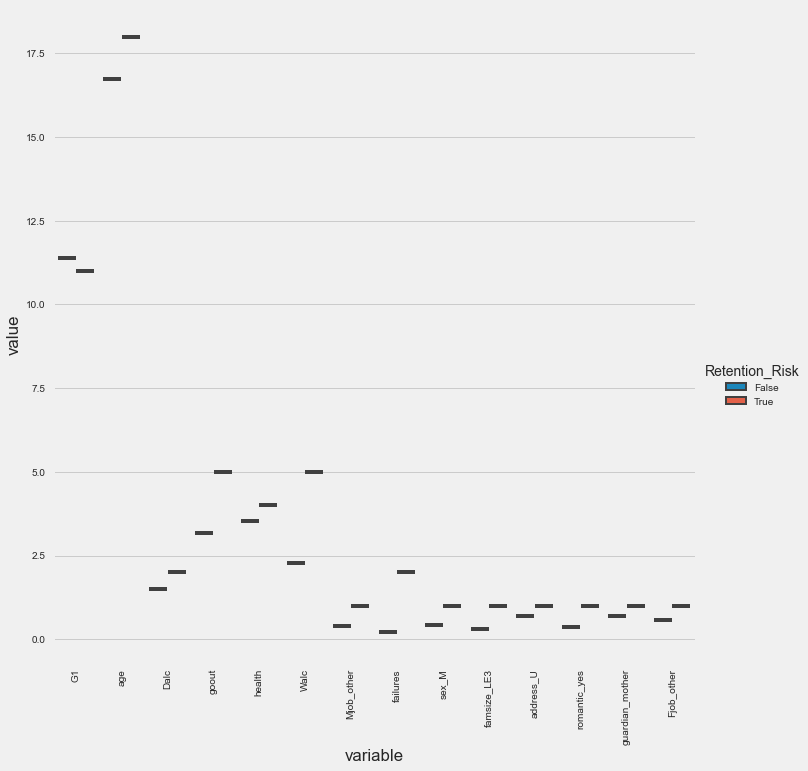

Student ID: 570


<Figure size 1152x432 with 0 Axes>

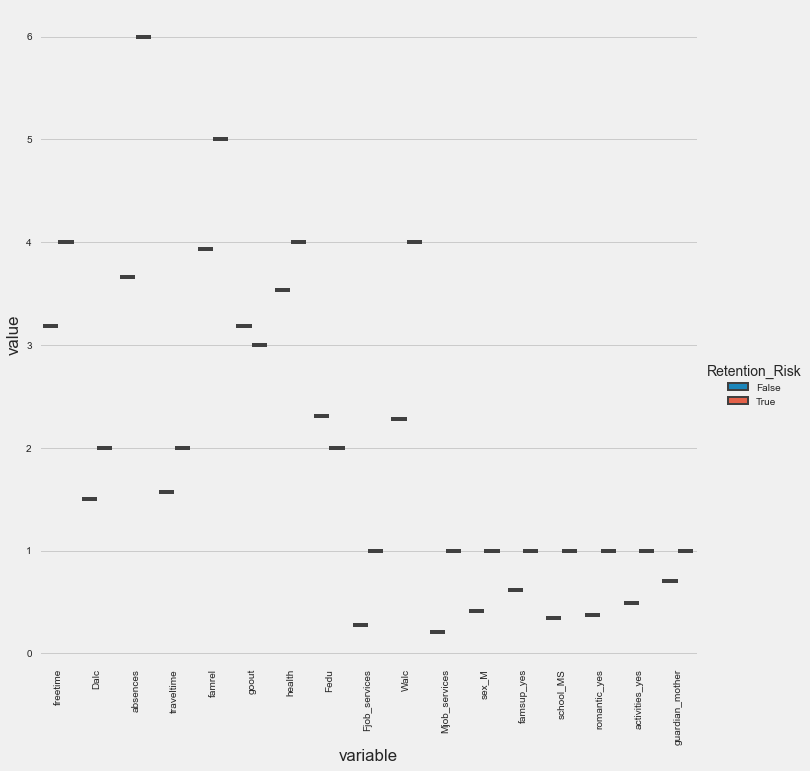

Student ID: 257


<Figure size 1152x432 with 0 Axes>

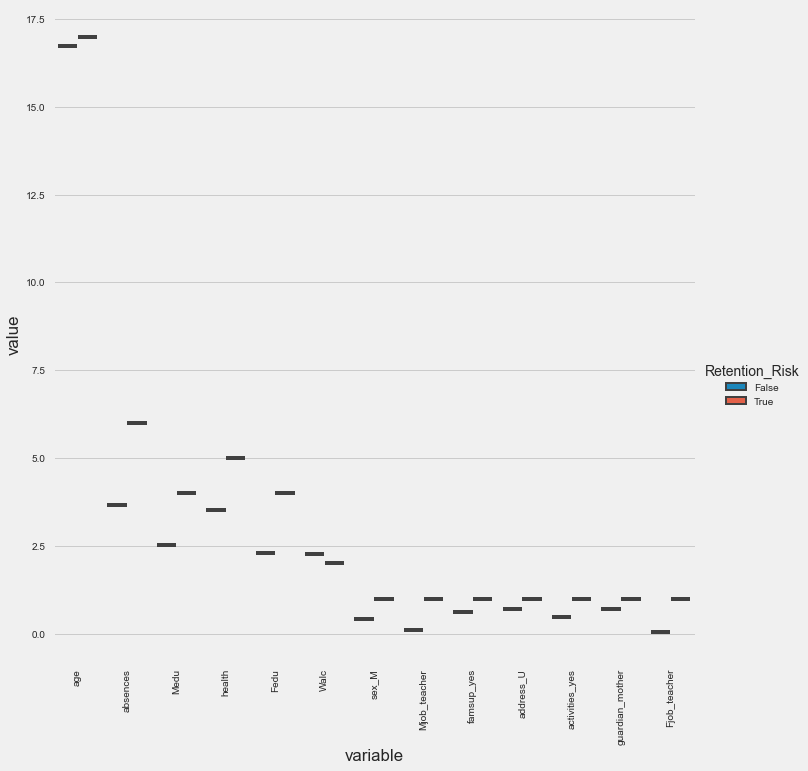

Student ID: 148


<Figure size 1152x432 with 0 Axes>

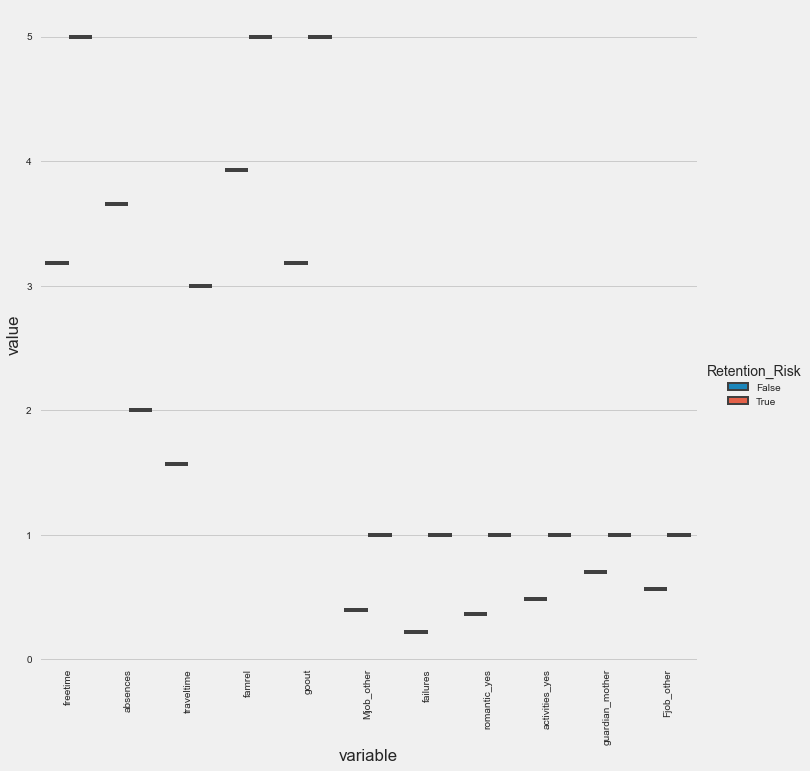

Student ID: 447


<Figure size 1152x432 with 0 Axes>

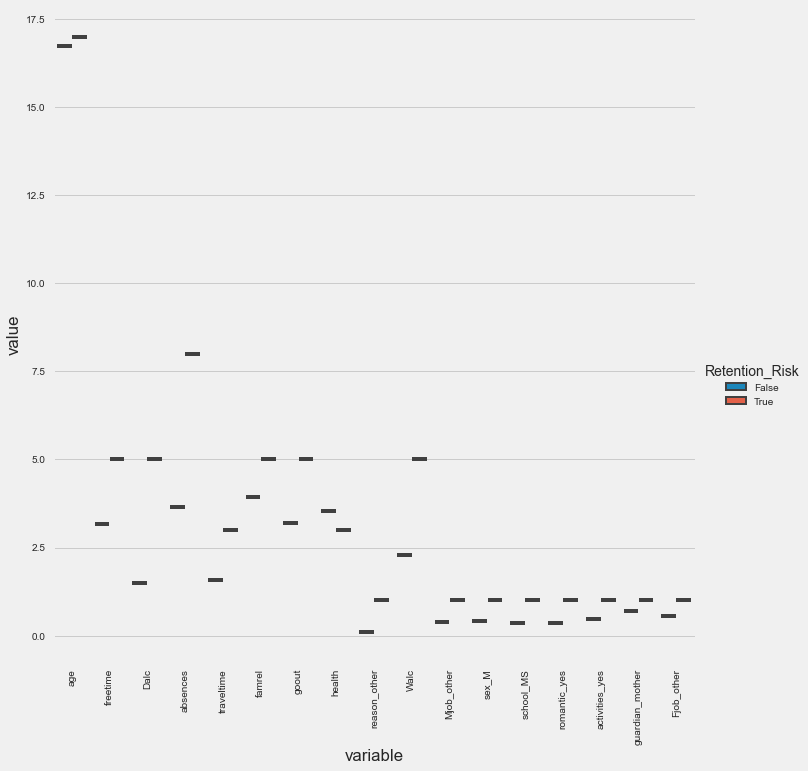

Student ID: 518


<Figure size 1152x432 with 0 Axes>

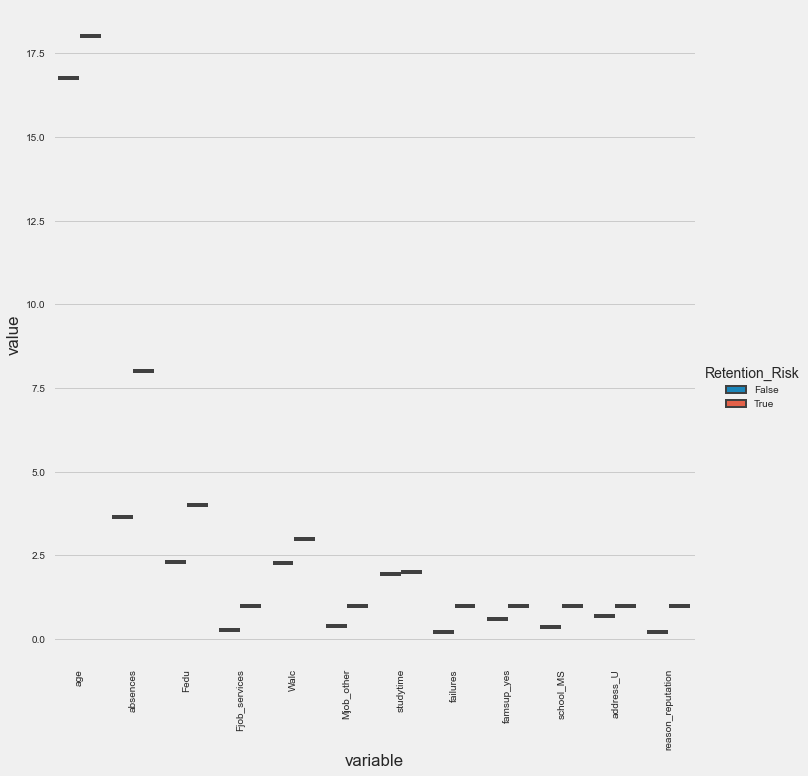

Student ID: 603


<Figure size 1152x432 with 0 Axes>

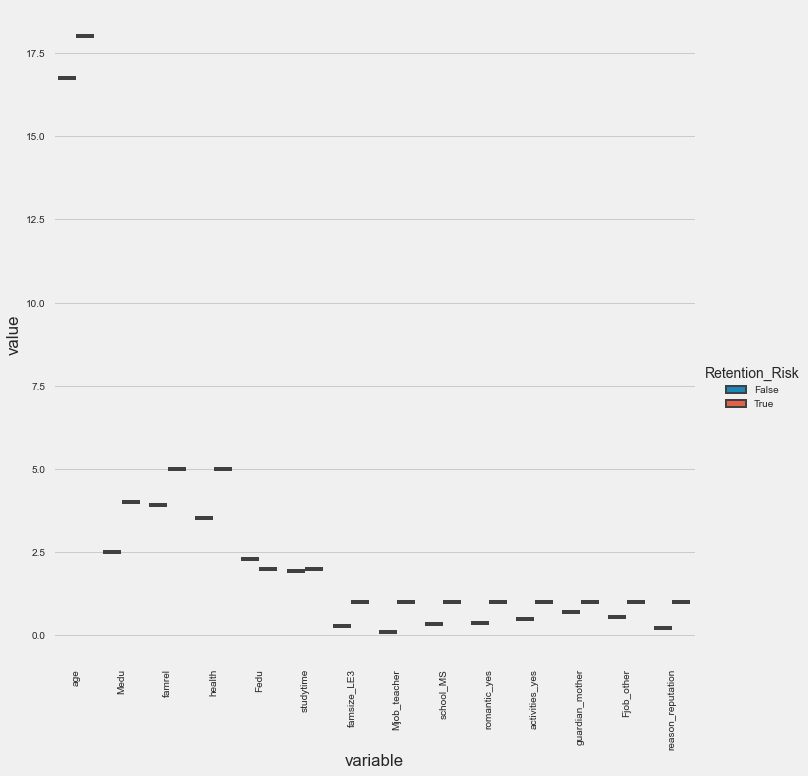

Student ID: 514


<Figure size 1152x432 with 0 Axes>

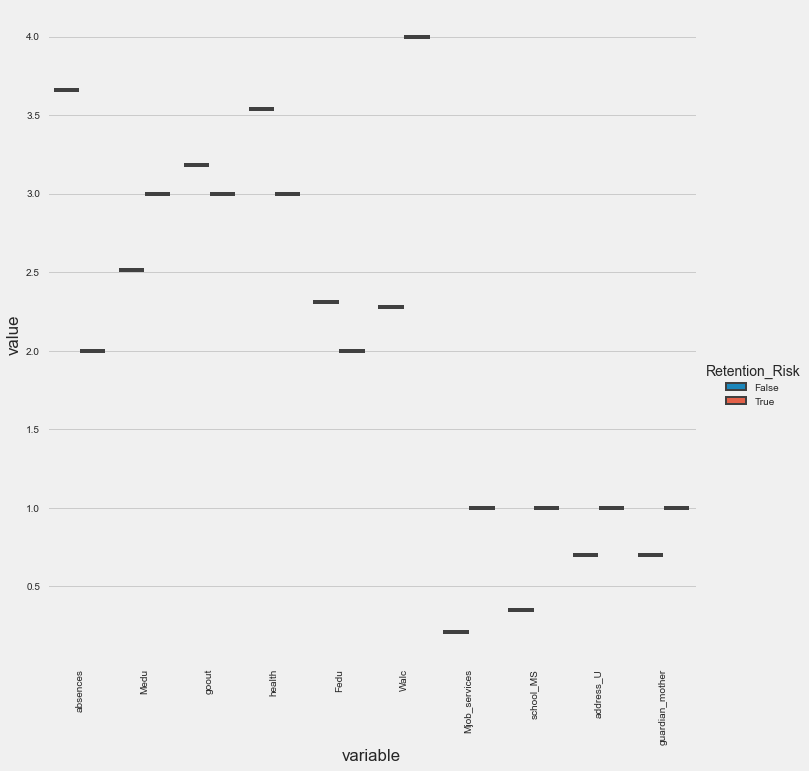

Student ID: 568


<Figure size 1152x432 with 0 Axes>

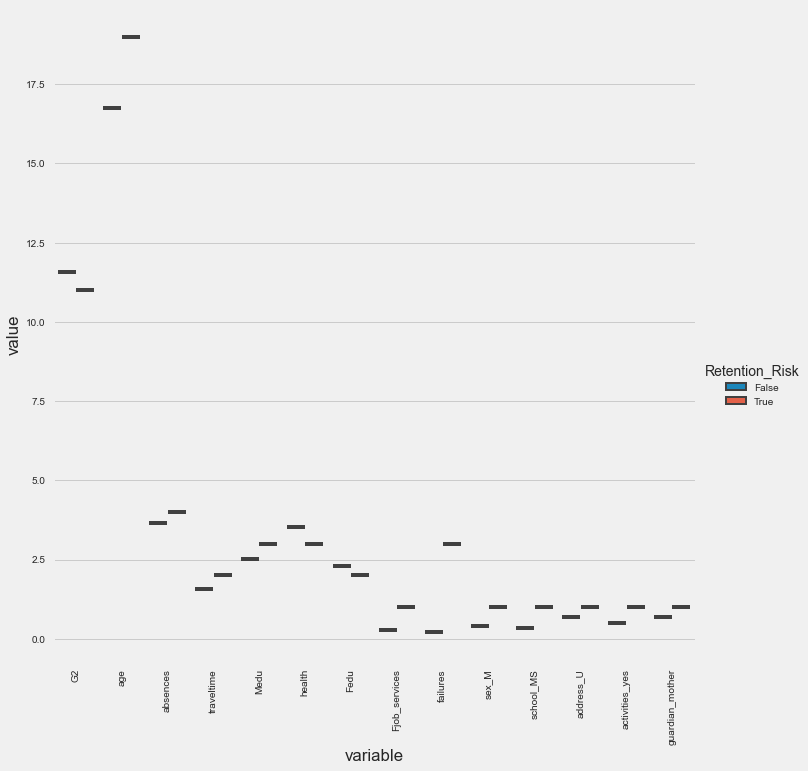

Student ID: 440


<Figure size 1152x432 with 0 Axes>

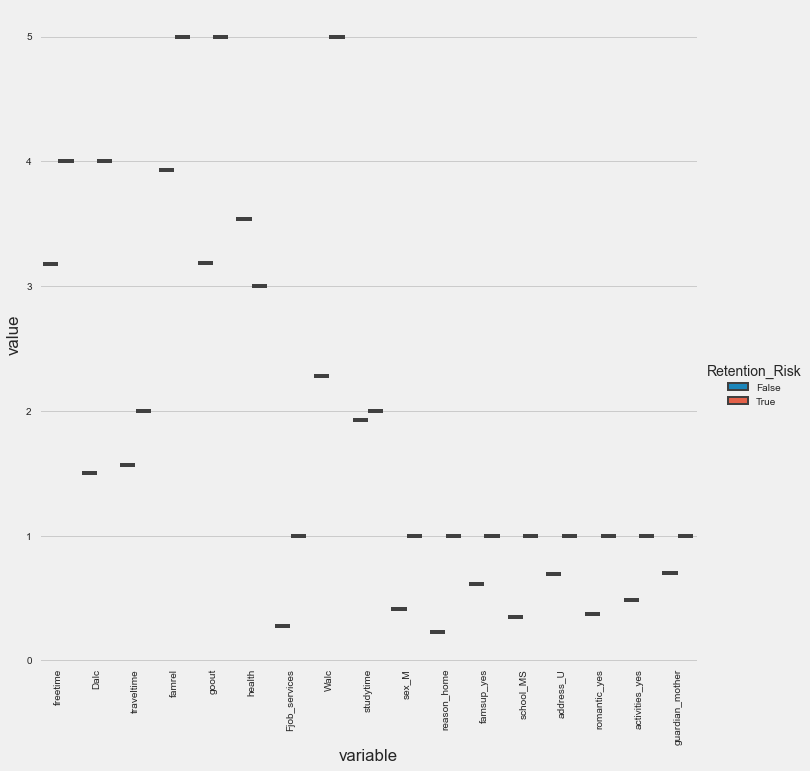

Student ID: 443


<Figure size 1152x432 with 0 Axes>

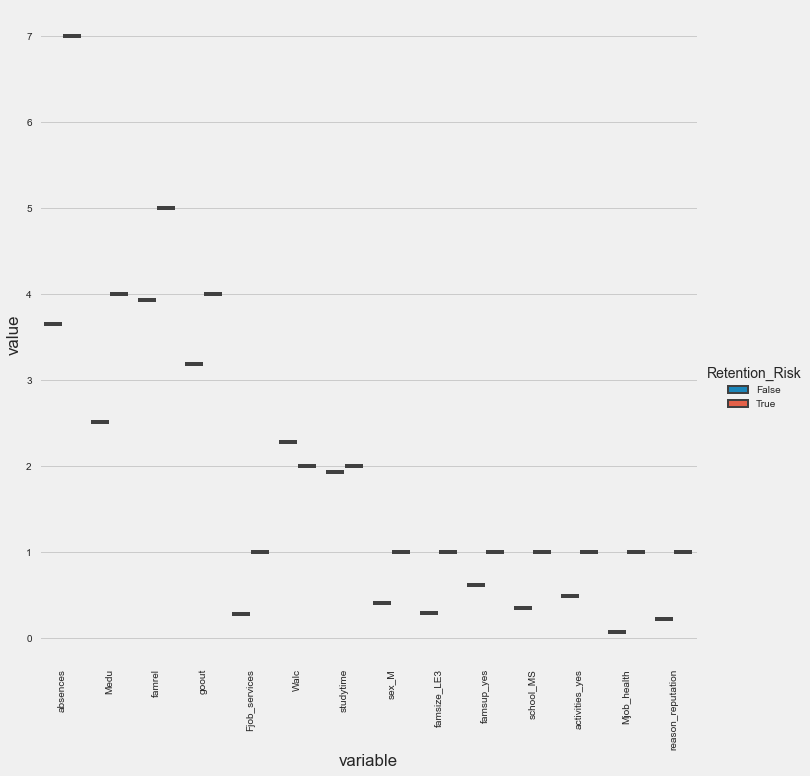

Student ID: 155


<Figure size 1152x432 with 0 Axes>

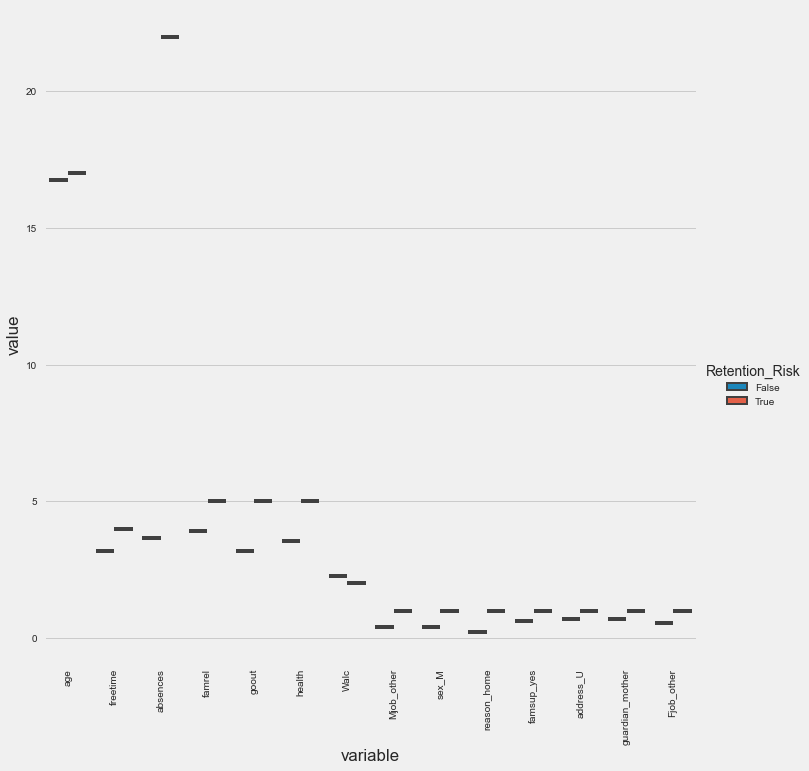

Student ID: 248


<Figure size 1152x432 with 0 Axes>

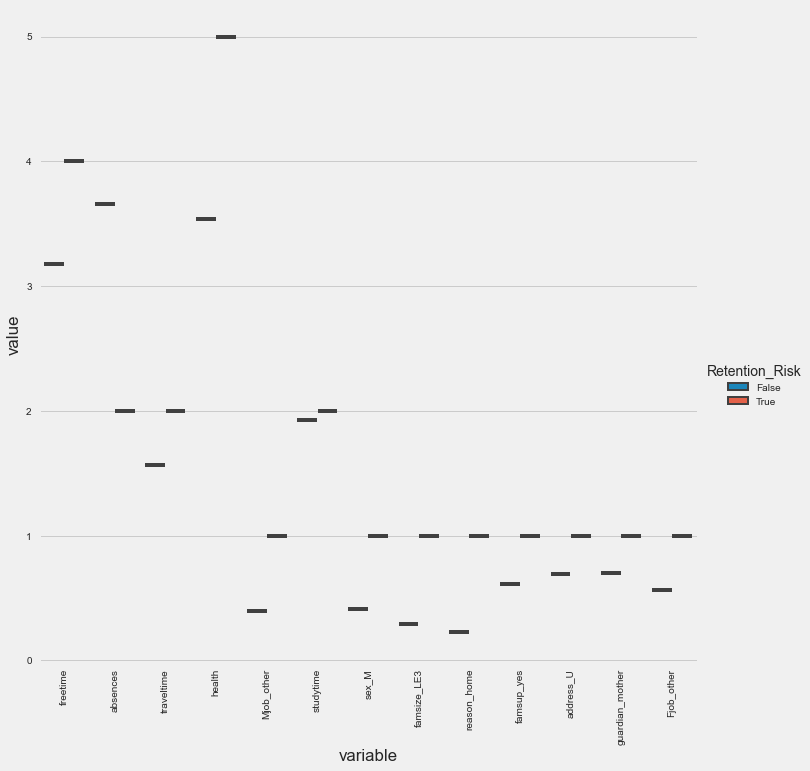

Student ID: 494


<Figure size 1152x432 with 0 Axes>

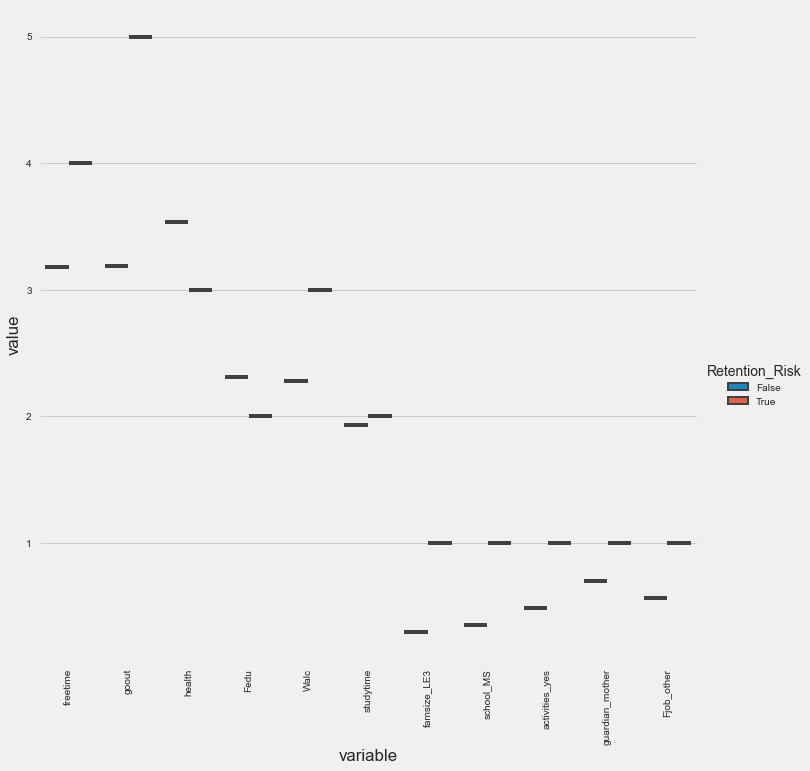

Student ID: 563


<Figure size 1152x432 with 0 Axes>

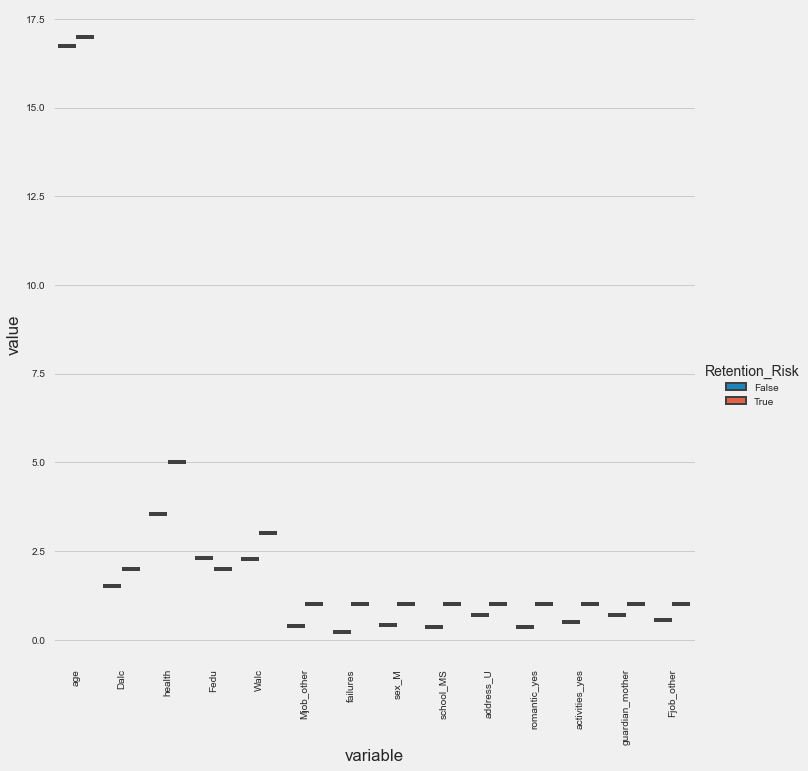

Student ID: 432


<Figure size 1152x432 with 0 Axes>

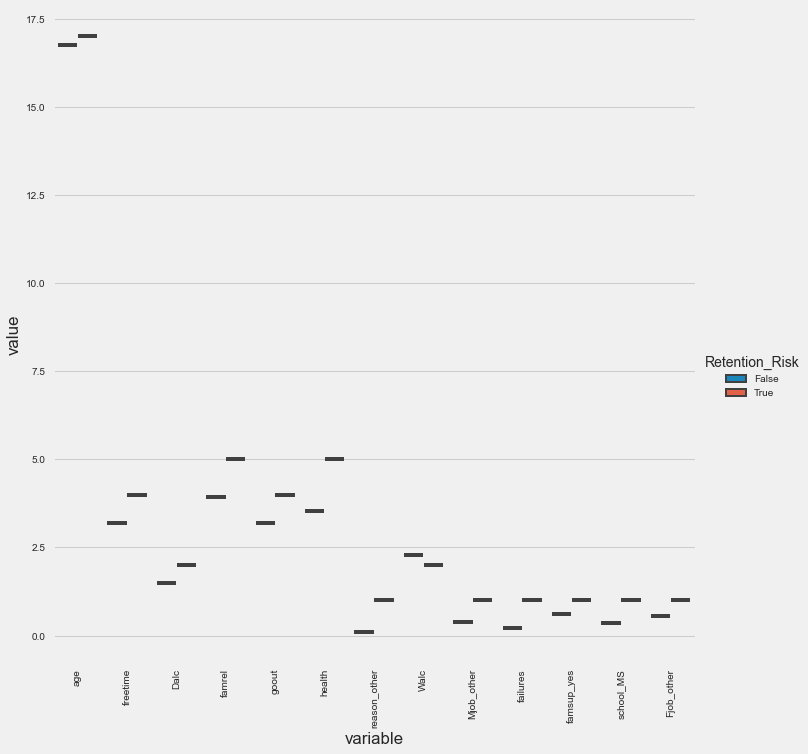

Student ID: 583


<Figure size 1152x432 with 0 Axes>

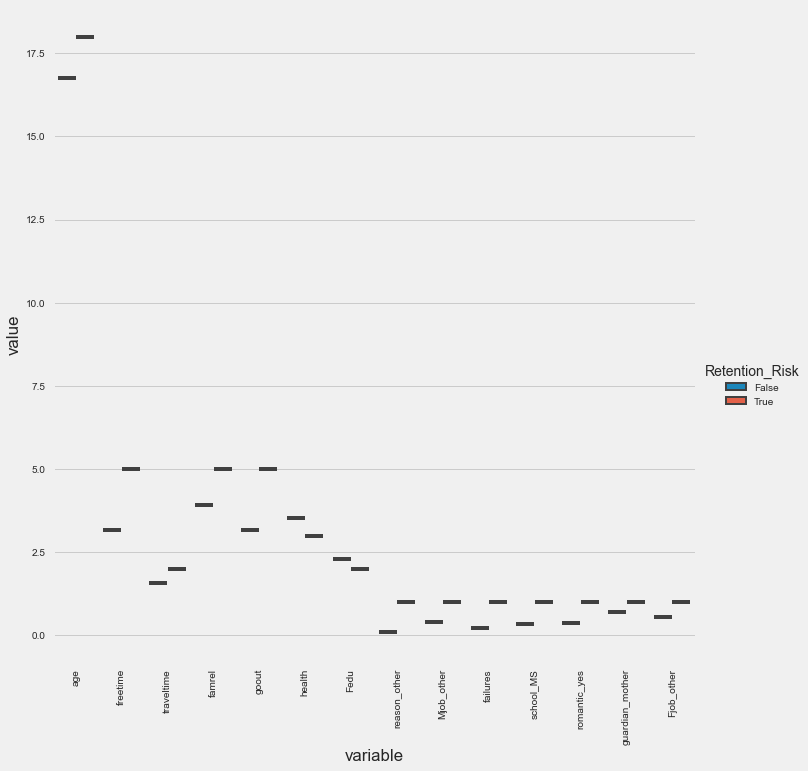

Student ID: 370


<Figure size 1152x432 with 0 Axes>

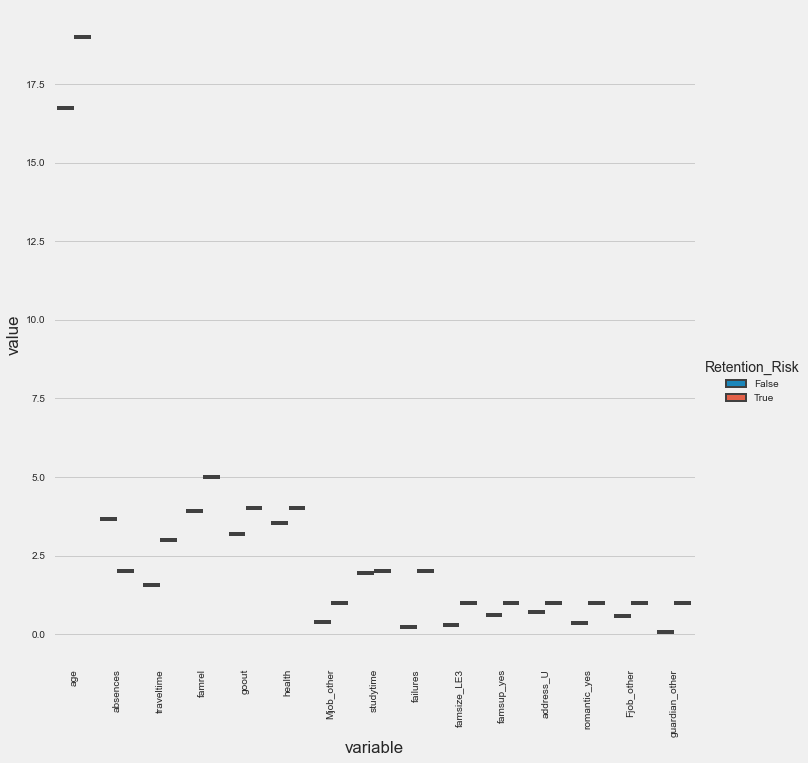

Student ID: 256


<Figure size 1152x432 with 0 Axes>

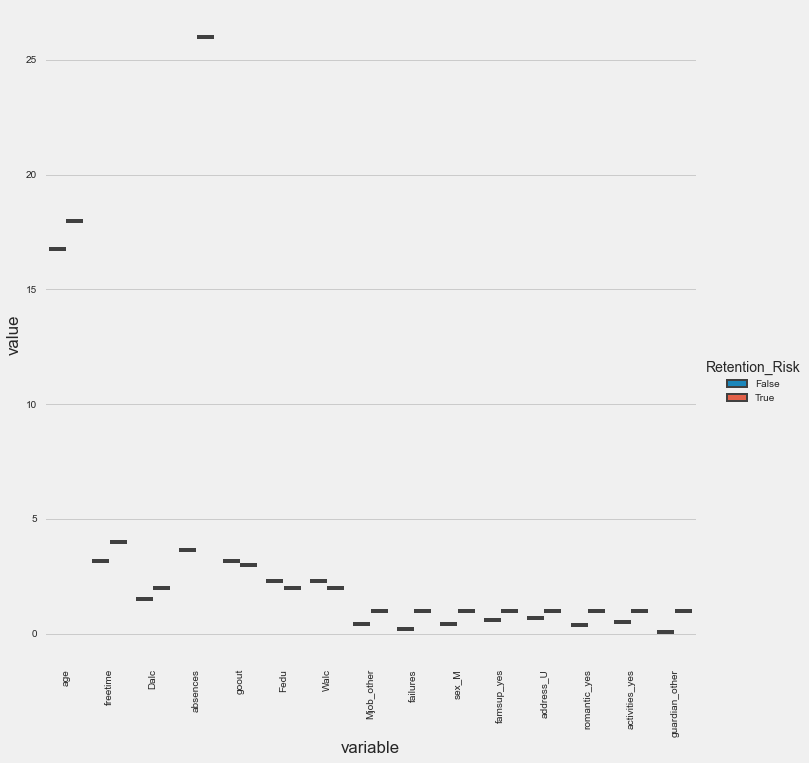

In [148]:

plt.style.use("fivethirtyeight")
lower_limit = 0.25
upper_limit = 0.75

# for index,content in students_in_trouble_dict.items():
for index,content in predicted_students_in_trouble.iterrows():
    student_id = index
    important_upper_features = []

    for feature in key_features:
        if content[feature] > student_por_df[feature].quantile(lower_limit):
            important_upper_features.append(feature)

    at_risk_student = pd.DataFrame(content[important_upper_features]).T
    at_risk_student['Retention_Risk'] = True
    
    student_mean = pd.DataFrame(student_por_df[important_upper_features].mean(axis=0)).T
    student_mean['Retention_Risk'] = False
    
    student_profile = pd.concat([at_risk_student, student_mean])
    student_profile = pd.melt(student_profile, id_vars="Retention_Risk")
#     print([content.get(key) for key in important_low_features])
    print('Student ID:', student_id)
    plt.figure(figsize=(16,6))
    g = sns.catplot(x='variable', y='value', height=10,hue='Retention_Risk'
                    ,data=student_profile, kind='box')
    g.set_xticklabels(rotation=90)
    plt.show()
    